<a href="https://colab.research.google.com/github/dipakbhandare09/Machine-Learning-Project/blob/main/Prediction_ML_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PUBG Finish Placement Prediction**

In this project we are predicting final placement from final in-game stats and initial player ratingg using the different machine learning models. 

**Downloading the dataset for training from the kaggle using opendatasets library.**

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
dataset_url= 'https://www.kaggle.com/competitions/pubg-finish-placement-prediction/data'

In [ ]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dipakbhandare
Your Kaggle Key: ··········


100%|██████████| 361M/361M [00:05<00:00, 71.1MB/s]



Extracting archive ./pubg-finish-placement-prediction/pubg-finish-placement-prediction.zip to ./pubg-finish-placement-prediction


In [ ]:
import os

In [ ]:
data_dir='./pubg-finish-placement-prediction'

In [ ]:
os.listdir(data_dir)

['train_V2.csv', 'sample_submission_V2.csv', 'test_V2.csv']

In [ ]:
train_csv= data_dir+'/train_V2.csv'

# **EDA**

**Now convert the csv file into the dataframe using panadas library for more analysis on  the data**

In [ ]:
import pandas as pd

In [ ]:
train_df = pd.read_csv(train_csv)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

**Here in our dataset total 4446966 Rows and total 29 Colimns**

# **Preprocessing**

it is better practice to delete the those rows where the target entries as not present. 

In [ ]:
train_df.dropna(subset=['winPlacePerc'], inplace=True)

# Visualisation

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

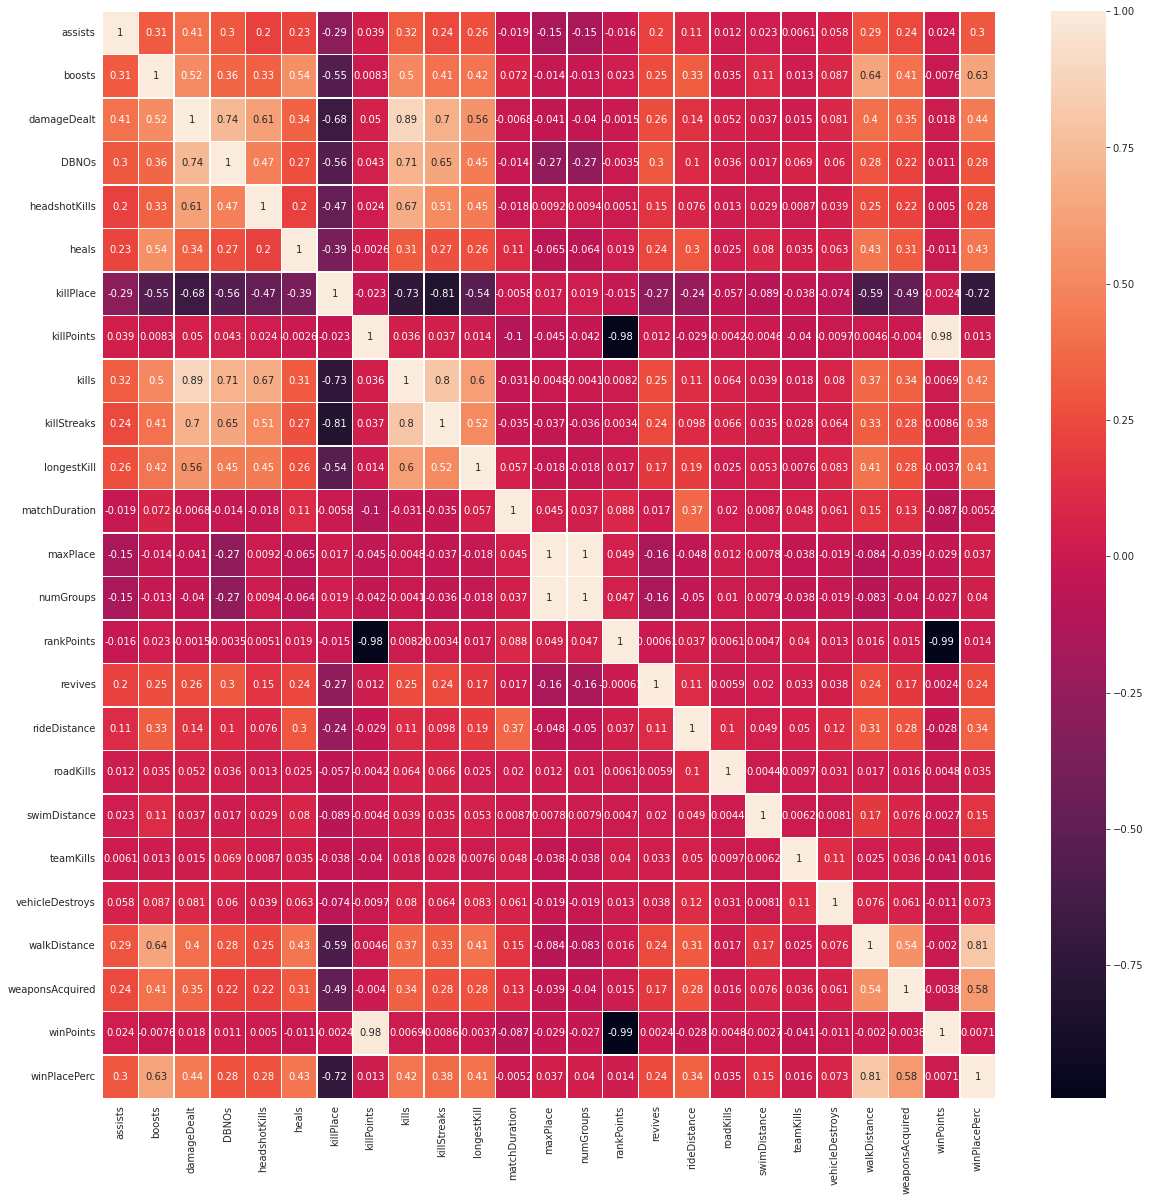

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,20))
sns.heatmap(train_df.corr(),annot=True, linewidths=.5)

The positive correlation show the direct relation between the dependent and independent features. negative correlation is meaningless .So just focus on some features with positive correlation.

### **inputs and targets columns in dataset**

In [ ]:
input_cols= train_df.columns[3:-1].tolist()
target_cols= 'winPlacePerc'

In [ ]:
train_inputs= train_df[input_cols].copy()
train_targets=train_df[target_cols].copy()

In [ ]:
train_inputs.shape

(4446965, 25)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


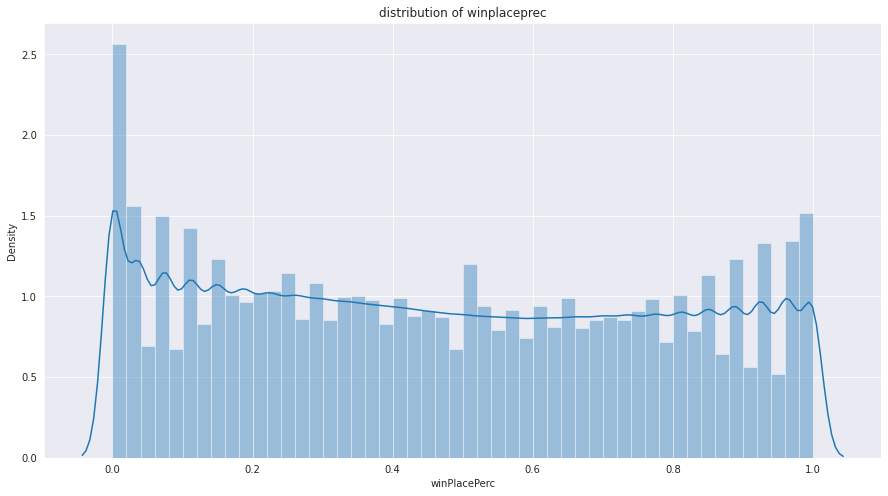

In [ ]:
plt.figure(figsize=(15,8))
plt.title('distribution of winplaceprec')
sns.distplot(train_targets)

**Now seperate out the numeric and categorical columns**

In [ ]:
import numpy as np

In [ ]:
numeric_cols= train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols= train_inputs.select_dtypes('object').columns.tolist()

In [ ]:
categorical_cols

['matchType']

Out of 25 columns only 1 columns is categorical and others are numeric in type some they are high range and some have values just 0 and 1 only . so it will save our time 

***Now lets check the missing values in the columns***

In [ ]:
train_inputs[numeric_cols].isna().any()
train_targets.isna().sum()

0

as we can observe that numerical columns doesnt have any Nan values. and initialy we drop those rows where the targets columns contians the nan values.

we assume that the values 0 present in the diffrent columns are true values not missing one beacuse headshotKills , heals, killPlace  etc. can have 0 values it means that player unable to take the headsho. 

In [ ]:
train_inputs[numeric_cols].describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
count,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,...,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06
mean,2.338150e-01,1.106908e+00,1.307172e+02,6.578757e-01,2.268196e-01,1.370148e+00,4.759936e+01,5.050062e+02,9.247835e-01,5.439553e-01,...,8.920103e+02,1.646590e-01,6.061158e+02,3.496092e-03,4.509323e+00,2.386841e-02,7.918209e-03,1.154218e+03,3.660488e+00,6.064603e+02
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746293e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,7.366478e+02,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261158e-02,1.183497e+03,2.456543e+00,7.397005e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,1.443000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,1.500000e+03,0.000000e+00,1.910000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,5.910000e+03,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03


# **Scaling the Numeric Features**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler= MinMaxScaler()
scaler.fit(train_df[numeric_cols])

MinMaxScaler()

In [ ]:
train_inputs[numeric_cols]= scaler.transform(train_inputs[numeric_cols])

We have Only one categorical columns . so lets encoded it first

***Encoding the categorical columns***

In [ ]:
train_inputs[categorical_cols].nunique()

matchType    16
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False , handle_unknown='ignore')
encoder.fit(train_inputs[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
encoded_cols= list(encoder.get_feature_names(categorical_cols))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
train_inputs[encoded_cols]= encoder.transform(train_inputs[categorical_cols])

In [ ]:
train_df= train_inputs[numeric_cols + encoded_cols]
print(train_df.shape)

(4446965, 40)


till now we do  a lot of work on data cleaning and data preprocessing . we scale the values in each columns , encoded the categorical columns etc. now our dataset is ready to train the models. 

# **Trainning The Model**

Here we have to predict the countinuous values of the target column 'winPlacePerc' so it Regression type problem therefore we use different Regression Model. 


let split our dataset into training and validation set to train the model using training set and validate it using the validation set.

**Training and validation set**

Training Set  use to train the model and ompute the loss and adjust the model's weights using an optimization technique.

validations set used to evaluate the model during training, tune model hyperparameters and pick the best version of the model.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    train_df, train_targets, test_size=0.25, random_state=42)


In [ ]:
print('train_inputs.shape: ',train_inputs.shape)
print('train_targets.shape: ', train_targets.shape)

print('val_inputs.shape: ', val_inputs.shape)
print('val_targets.shape: ', val_targets.shape)

train_inputs.shape:  (3335223, 40)
train_targets.shape:  (3335223,)
val_inputs.shape:  (1111742, 40)
val_targets.shape:  (1111742,)


Here we create training and validation set.

# **Model 1: Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
linear_model=LinearRegression()
linear_model.fit(train_inputs, train_targets)

LinearRegression()

Here we create a model and fit it using training set.

In [ ]:
train_pred=linear_model.predict(train_inputs)
val_pred=linear_model.predict(val_inputs)
print(train_pred.shape)
train_pred

(3335223,)


array([0.47340393, 0.95850754, 1.32696533, ..., 0.08959579, 0.37346268,
       0.701828  ])

***Lets check the training and validation loss using RMSE Loss fuction***

In [ ]:
train_error= mean_squared_error(train_targets, train_pred,squared=False)
val_error= mean_squared_error(val_targets, val_pred, squared=False)

In [ ]:
print('Training error : ',train_error )
print('Validation erro : ',val_error)

linear_error= train_error, val_error

Training error :  0.12309555856535102
Validation erro :  0.12303366835385805


In [ ]:
linear_model.coef_

array([ 3.34762106e-01,  4.57139714e-01,  4.60852555e-01, -3.96864978e-01,
        1.36913403e-01,  4.65496871e-02, -7.44134714e-01, -1.12092458e-01,
       -9.32423366e-01, -2.95894602e+00, -2.45191573e-03, -3.37525000e-01,
        2.06672436e-01,  4.68025076e-01,  6.39518094e-01,  4.80687233e-01,
        7.27510203e-01,  4.22372047e-01,  4.26760111e-01, -1.72695533e-01,
        5.73216291e-02,  2.83229866e+00,  2.85487022e+00,  3.00728843e-01,
        3.37496797e+10,  3.37496797e+10,  3.37496797e+10,  3.37496797e+10,
        3.37496797e+10,  3.37496797e+10,  3.37496797e+10,  3.37496797e+10,
        3.37496797e+10,  3.37496797e+10,  3.37496797e+10,  3.37496797e+10,
        3.37496797e+10,  3.37496797e+10,  3.37496797e+10,  3.37496797e+10])

In [ ]:
linear_model.intercept_

-33749679683.552147

# prediction on sample  inputs

In [ ]:
categorical_cols

['matchType']

In [ ]:
single_input= {'DBNOs': 0,
 'Id': '8a706bc525a3cb',
 'assists': 0,
 'boosts': 1,
 'damageDealt': 25.8,
 'groupId': '22d1e4cd6d6a62',
 'headshotKills': 0,
 'heals': 0,
 'killPlace': 44,
 'killPoints': 0,
 'killStreaks': 0,
 'kills': 0,
 'longestKill': 0.0,
 'matchDuration': 1977,
 'matchId': '08f83a93dbd231',
 'matchType': 'squad-fpp',
 'maxPlace': 48,
 'numGroups': 45,
 'rankPoints': 1547,
 'revives': 0,
 'rideDistance': 7481.0,
 'roadKills': 0,
 'swimDistance': 0.0,
 'teamKills': 0,
 'vehicleDestroys': 0,
 'walkDistance': 2168.0,
 'weaponsAcquired': 1,
 'winPoints': 0}

In [ ]:
new_input_df = pd.DataFrame([single_input])

In [ ]:
new_input_df

,DBNOs,Id,assists,boosts,damageDealt,groupId,headshotKills,heals,killPlace,killPoints,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,0,8a706bc525a3cb,0,1,25.8,22d1e4cd6d6a62,0,0,44,0,...,1547,0,7481.0,0,0.0,0,0,2168.0,1,0


In [ ]:
new_input_df[numeric_cols]=scaler.transform(new_input_df[numeric_cols])
new_input_df[encoded_cols]= encoder.transform(new_input_df[categorical_cols])

In [ ]:
new_input= new_input_df[numeric_cols+encoded_cols]

In [ ]:
new_input

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0.0,0.030303,0.0039,0.0,0.0,0.0,0.43,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
new_predict= linear_model.predict(new_input)

In [ ]:
new_predict

array([0.83755493])

here we get the value of ** winPlacePerc is  0.83755493**   for a single new input.

# Saving the Training Model

In [ ]:
import joblib

In [ ]:
model1_prediction= {
    'model1':linear_model,
    'scaler':scaler,
    'encoder':encoder,
    'input_cols':input_cols,
    'target_cols':target_cols,
    'numeric_cols':numeric_cols,
    'categorical_cols':categorical_cols,
    'encoded_cols':encoded_cols
}

saving this file using joblib.dump

In [ ]:
joblib.dump(model1_prediction,'(model1_prediction.joblib')

['(model1_prediction.joblib']

Till now we have loaded the dataset from kagle , imported it using pandas library , we have done some data preprocessing including imputing missing value , finding input and target cols , get the numeric cols and categorical cols we have scaled the numeric cols and encoded the categorical cols. then we have created our training and validation set and based on training set we have train our firts model which is Linear Regression. Now looking forward for Our secodn model Which is DecisionTreeRegressor. 
now lets train our second model.

# Model 2 : DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
tree_model= DecisionTreeRegressor(random_state=42)

In [ ]:
tree_model.fit(train_inputs,train_targets)

DecisionTreeRegressor(random_state=42)

In [ ]:
train_pred=tree_model.predict(train_inputs)
val_pred=tree_model.predict(val_inputs)

In [ ]:
train_err= mean_squared_error(train_targets,train_pred, squared=False)
val_err=mean_squared_error(val_targets, val_pred, squared=False)

In [ ]:
print('training error : ', train_err)
print('validation error : ', val_err)

training error :  0.002118399920041158
validation error :  0.11630400553453787


Here the training error is very low but the validation error is quite high (**Overfitting**) generally it happens in case of dicison tree beacuse decision tree recall all the training examples but fails to predict to unknown data . so to solve this problem we have to tune the different hyperparameters

In [ ]:
base_tree_model= train_err,val_err

lets compare the error with errors that we got in linear model.

In [ ]:
print('base_tree_model ',base_tree_model )
print('linear_error ',linear_error)

base_tree_model  (0.002118399920041158, 0.11630400553453787)
linear_error  (0.12309555856535102, 0.12303366835385805)


Here Our Model2 which is **decision tree regressor better than** that of our model1 which linear model ,  decision tree regressor gives the lower training  and validation error than that of linear model.

#** hyperparameter tunning**

In [ ]:
tree_model.tree_.max_depth

57

here the maximum depth of our tree model is high som lets change the values of maxdepth and observe the variation in training and validation error.

In [ ]:
def tune_para(**para):
    tree_model=DecisionTreeRegressor(random_state=42, **para)
    tree_model.fit(train_inputs,train_targets)
    train_predict = tree_model.predict(train_inputs)
    val_predict=tree_model.predict(val_inputs)
    return mean_squared_error(train_targets,train_predict, squared=False),mean_squared_error(val_targets, val_predict, squared=False)

# max_depth

In [ ]:
tune_para(max_depth=20)

(0.0682162429123351, 0.09386811946044606)

In [ ]:
print('base_tree_model ',base_tree_model )
print('linear_error ',linear_error)

base_tree_model  (0.002118399920041158, 0.11630400553453787)
linear_error  (0.12309555856535102, 0.12303366835385805)


as we decrease the maximum depth from **57 to 20** the validation error decrease and training error increase slightly . but the our model with **max_depth=20** if **far better than** that of our linearmodel and the base tree model.

as we lowering the max_depth the **overfitting reduces** so lets find the best possible value for max_depth

In [ ]:
def tune_para(md):
    tree_model=DecisionTreeRegressor(random_state=42, max_depth=md)
    tree_model.fit(train_inputs,train_targets)
    train_predict = tree_model.predict(train_inputs)
    val_predict=tree_model.predict(val_inputs)
    return {'max_depth':md,
            'train_error':mean_squared_error(train_targets,train_predict, squared=False),
            'val_error':mean_squared_error(val_targets, val_predict, squared=False)}
    

In [ ]:
error_df= pd.DataFrame([tune_para(md) for md in range(5,31,5)])

In [ ]:
error_df

,max_depth,train_error,val_error
0,5,0.121680,0.121795
1,10,0.097732,0.098110
2,15,0.083311,0.087694
3,20,0.068216,0.093868
4,25,0.045726,0.106309
5,30,0.024630,0.113568


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

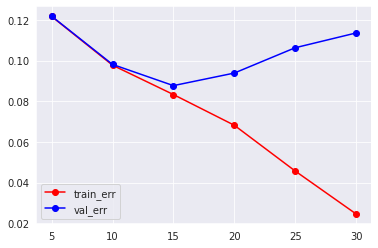

In [ ]:
sns.set_style('darkgrid')
plt.plot(error_df.max_depth,error_df.train_error, 'r-o')
plt.plot(error_df.max_depth,error_df.val_error, 'b-o')
plt.legend(['train_err','val_err'])

so as we can see that after the max_depth 15 the validation error start to increasing . it means that at max_depth=15 we get the lowest validation error.

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/iam-dipak-bhandare/dipak-ml-courseproject


'https://jovian.ai/iam-dipak-bhandare/dipak-ml-courseproject'

# max_leaf_nodes
Another way to control the size of complexity of a decision tree is to limit the number of leaf nodes. This allows branches of the tree to have varying depths.

In [ ]:
def tune_max_leaf_nodes(**para):
    tree_model=DecisionTreeRegressor(random_state=42, **para)
    tree_model.fit(train_inputs,train_targets)
    train_predict = tree_model.predict(train_inputs)
    val_predict=tree_model.predict(val_inputs)
    return tree_model.tree_.max_depth,mean_squared_error(train_targets,train_predict, squared=False),mean_squared_error(val_targets, val_predict, squared=False)

In [ ]:
tune_max_leaf_nodes(max_leaf_nodes=100)

(10, 0.10676526433373673, 0.10679681219715706)

In [ ]:
tune_max_leaf_nodes(max_leaf_nodes=200)

(12, 0.10178540363913241, 0.10194697742697818)

In [ ]:
tune_max_leaf_nodes(max_leaf_nodes=400)

(14, 0.09673300984914399, 0.09693551981567079)

In [ ]:
tune_max_leaf_nodes(max_leaf_nodes=800)

(16, 0.09274254322031644, 0.09310207736280733)

In [ ]:
tune_max_leaf_nodes(max_leaf_nodes=1600)

(19, 0.08914612922797739, 0.08991398258772576)

so at max_leaf_nodes=1600 we get the better validation  and training error which is very close to the error that we get for max_depth of 15 . but for max_leaf_nodes 1600 we get the tree of maxdepth 19 . so lets define our final model.

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/iam-dipak-bhandare/dipak-ml-courseproject


'https://jovian.ai/iam-dipak-bhandare/dipak-ml-courseproject'

# **final model** 

In [ ]:
tree_model=DecisionTreeRegressor(random_state=42, max_depth=15, max_leaf_nodes=1600)
tree_model.fit(train_inputs,train_targets)

DecisionTreeRegressor(max_depth=15, max_leaf_nodes=1600, random_state=42)

In [ ]:
ftrain_predict = tree_model.predict(train_inputs)
fval_predict=tree_model.predict(val_inputs)

In [ ]:
print('training_error = ',mean_squared_error(train_targets,ftrain_predict, squared=False))
print('validation_erro = ',mean_squared_error(val_targets, fval_predict, squared=False))

training_error =  0.08928291634107295
validation_erro =  0.09005404821001238


In [ ]:
final_model=mean_squared_error(train_targets,ftrain_predict, squared=False),mean_squared_error(val_targets, fval_predict, squared=False)

**Final comparision between linear model, base tree model and final model**

In [ ]:
print('linear_model_error: ', linear_error)
print('base_tree_model_error: ',base_tree_model)
print('final_model_error: ',final_model)

linear_model_error:  (0.12309555856535102, 0.12303366835385805)
base_tree_model_error:  (0.002118399920041158, 0.11630400553453787)
final_model_error:  (0.08928291634107295, 0.09005404821001238)


Here we can see that our final model is far better than the othe two giving the lowest training and validation error which is **final_model_error:  (0.08928291634107295, 0.09005404821001238)**.  and also it is **not overfitting** the data . 


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/iam-dipak-bhandare/dipak-ml-project1


'https://jovian.ai/iam-dipak-bhandare/dipak-ml-project1'

# Plot our final Decision Tree regressor

In [ ]:
from sklearn.tree import plot_tree 

[Text(0.5, 0.9, 'walkDistance <= 0.033\nsquared_error = 0.095\nsamples = 3335223\nvalue = 0.473'),
 Text(0.25, 0.7, 'killPlace <= 0.735\nsquared_error = 0.038\nsamples = 1785990\nvalue = 0.25'),
 Text(0.125, 0.5, 'walkDistance <= 0.012\nsquared_error = 0.034\nsamples = 1071944\nvalue = 0.351'),
 Text(0.0625, 0.3, 'killStreaks <= 0.025\nsquared_error = 0.033\nsamples = 559388\nvalue = 0.288'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'killPlace <= 0.635\nsquared_error = 0.025\nsamples = 512556\nvalue = 0.419'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'killPlace <= 0.825\nsquared_error = 0.007\nsamples = 714046\nvalue = 0.098'),
 Text(0.3125, 0.3, 'killPlace <= 0.775\nsquared_error = 0.005\nsamples = 307587\nvalue = 0.164'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'killPlace <= 0.875\nsquared_error = 0.002\nsamples = 406459\nva

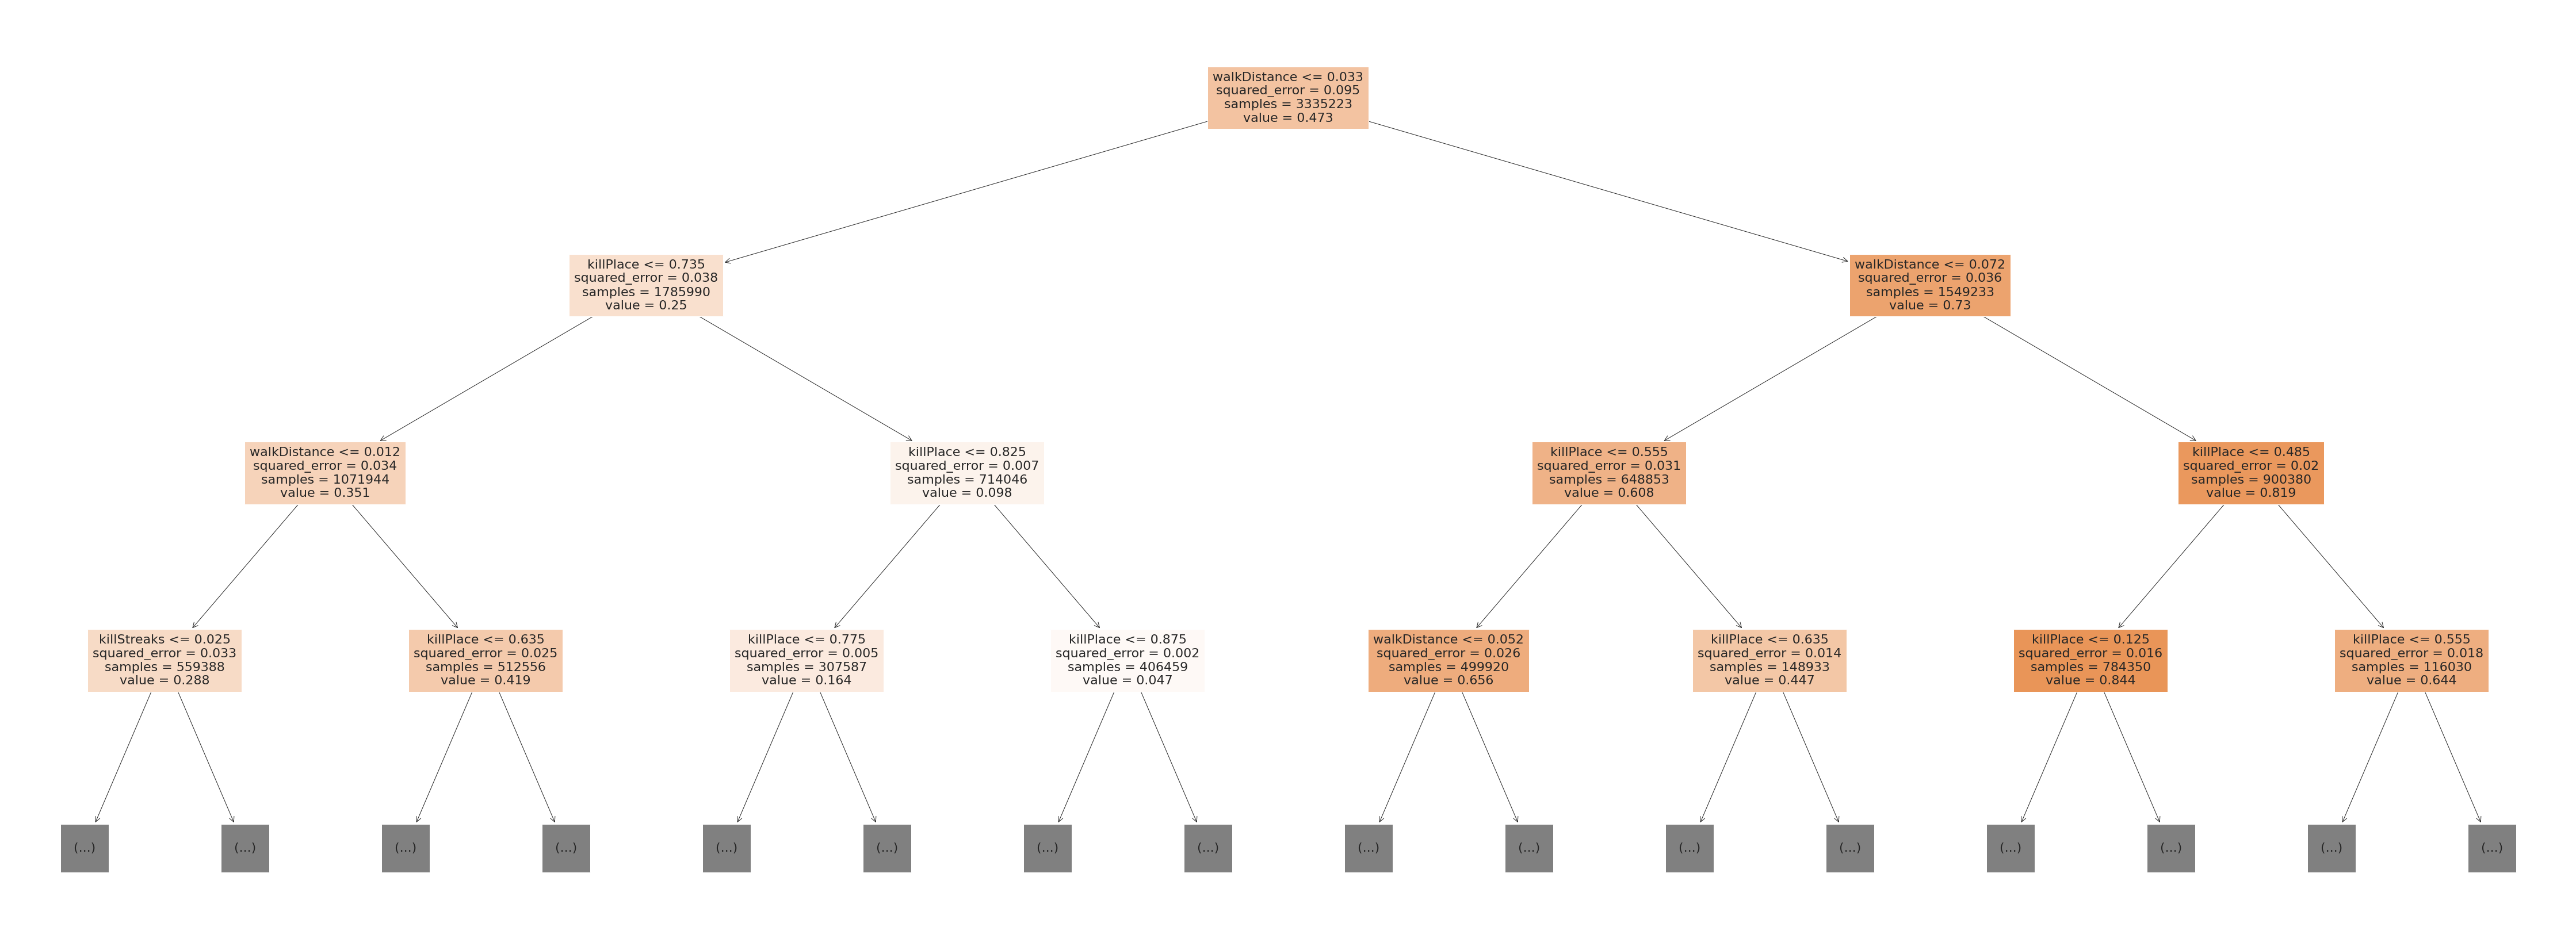

In [ ]:
plt.figure(figsize=(80,30))
plot_tree(tree_model, feature_names=train_inputs.columns, max_depth=3, filled=True)

# Feature importance

In [ ]:
tree_model.feature_importances_

array([2.39608794e-04, 3.44601374e-03, 7.41974349e-05, 3.74847365e-03,
       0.00000000e+00, 1.34309784e-04, 1.92089527e-01, 0.00000000e+00,
       5.47969091e-03, 6.67092836e-03, 4.90827634e-05, 8.92711059e-03,
       9.76920264e-03, 1.21078239e-02, 2.08928047e-05, 0.00000000e+00,
       3.75149697e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.49884897e-01, 6.32745946e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.32095078e-05,
       0.00000000e+00, 5.38022397e-06, 0.00000000e+00, 3.98943129e-04,
       0.00000000e+00, 2.62028062e-05, 5.79513963e-06, 1.23074095e-04,
       4.21363584e-04, 5.29702823e-04, 7.24530529e-04, 6.75795247e-04])

In [ ]:
imp_features=pd.DataFrame({'features': train_inputs.columns,
                    'importance': tree_model.feature_importances_})
imp_features.sort_values('importance', ascending=False).head(5)

,features,importance
21,walkDistance,0.749885
6,killPlace,0.192090
13,numGroups,0.012108
12,maxPlace,0.009769
11,matchDuration,0.008927


# prediction on sample inputs

In [ ]:
single_input= {'DBNOs': 0,
 'Id': '8a706bc525a3cb',
 'assists': 0,
 'boosts': 1,
 'damageDealt': 25.8,
 'groupId': '22d1e4cd6d6a62',
 'headshotKills': 0,
 'heals': 0,
 'killPlace': 44,
 'killPoints': 0,
 'killStreaks': 0,
 'kills': 0,
 'longestKill': 0.0,
 'matchDuration': 1977,
 'matchId': '08f83a93dbd231',
 'matchType': 'squad-fpp',
 'maxPlace': 48,
 'numGroups': 45,
 'rankPoints': 1547,
 'revives': 0,
 'rideDistance': 7481.0,
 'roadKills': 0,
 'swimDistance': 0.0,
 'teamKills': 0,
 'vehicleDestroys': 0,
 'walkDistance': 2168.0,
 'weaponsAcquired': 1,
 'winPoints': 0}

In [ ]:
new_input_df = pd.DataFrame([single_input])

In [ ]:
new_input_df[numeric_cols]=scaler.transform(new_input_df[numeric_cols])
new_input_df[encoded_cols]= encoder.transform(new_input_df[categorical_cols])

In [ ]:
new_input= new_input_df[numeric_cols+encoded_cols]
new_input


,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0.0,0.030303,0.0039,0.0,0.0,0.0,0.43,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
new_inpu_prediction= tree_model.predict(new_input)
print('new_inpu_prediction: ',new_inpu_prediction)

new_inpu_prediction:  [0.80072894]


# References:

Linear regression model : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


Decision tree regressor : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

Visualisation using matplotlib : https://matplotlib.org/

you can also watch this video for better understanding of DecisionTreeRegressor: https://www.youtube.com/watch?v=FyCFOdegFtc


also For Dataset we can follow this link on kaggle  : https://www.kaggle.com/competitions/pubg-finish-placement-prediction/data


#                  Thank You !